In [1]:
%matplotlib widget
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from scipy import constants

In [2]:
#Changes in free energy relative to PC
DG_PG_5  = -7
DG_PG_WT = -11
DG_PE_5  = -2
DG_PE_WT = -9

In [33]:
#logspace
N = 1000 #number of subsamples
xmin = -9 
xmax = -1e-12

grid_x = np.logspace(xmin, xmax, N)

xPG, xPE = np.meshgrid(grid_x, grid_x) #titration grid

xPC =  np.full((N, N), 1.0) - (xPG + xPE) #PC+PG+PE=1
mask = xPC<0
xPG=np.where(~mask, xPG, np.nan)
xPE=np.where(~mask, xPE, np.nan)

In [34]:
temperature = 303.15 #Kelvin
RT = temperature*constants.R/(1000*constants.calorie) #kcal/mol

#Boltzmann weights
KCG5  = np.exp(-DG_PG_5 / RT)
KCGWT = np.exp(-DG_PG_WT / RT)
KCE5  = np.exp(-DG_PE_5 / RT)
KCEWT = np.exp(-DG_PE_WT / RT)

data = (xPC + KCG5 * xPG + KCE5 * xPE) / (xPC + KCGWT * xPG + KCEWT * xPE)
data = np.log(data)


#data=np.where(mask, data, np.nan)


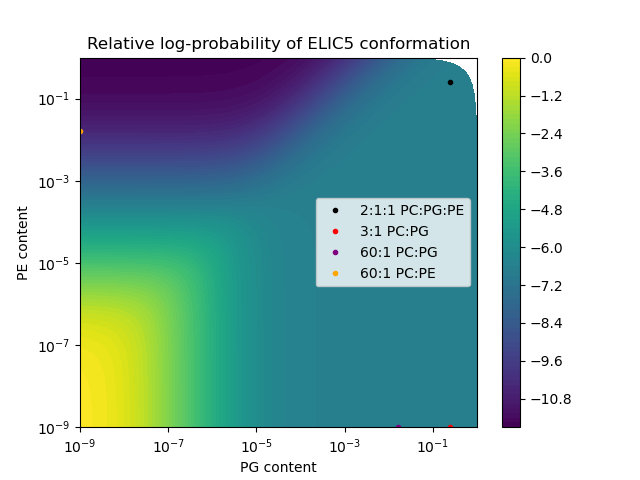

In [43]:
%matplotlib widget
#plt.contourf(np.log(xPG), np.log(xPE), data, levels=100)
plt.plot(0.25, 0.25, ".k", label='2:1:1 PC:PG:PE')
plt.plot(0.25, 1e-9, ".r", label='3:1 PC:PG')
plt.plot(1/60, 1e-9, ".", color='purple', label='60:1 PC:PG')
plt.plot(1e-9, 1/60, ".", color='orange', label='60:1 PC:PE')
plt.contourf(xPG, xPE, data, levels=100)
# plt.contour(np.log10(grid_x), np.log10(grid_y), data, levels=40, color='black')
plt.xlabel("PG content")
plt.ylabel("PE content")
plt.title("Relative log-probability of ELIC5 conformation")
plt.legend(loc='center right')
plt.xscale("log")
plt.yscale("log") 
plt.xlim([1e-9,1])
plt.ylim([1e-9,1])
plt.colorbar()
plt.savefig('log_E5.png', dpi=600)

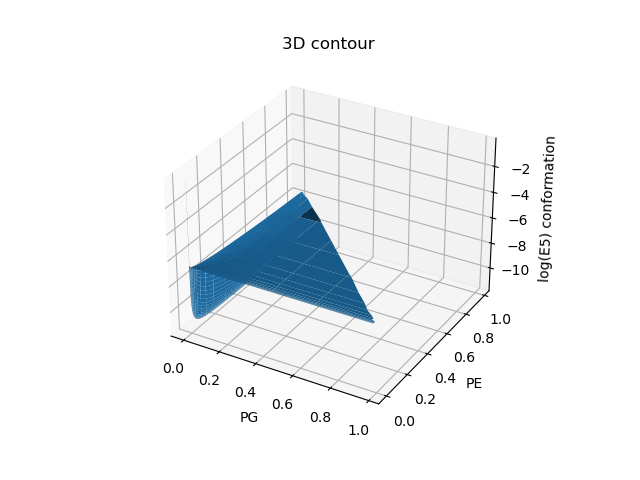

In [44]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xPG, xPE, data)
ax.set_xlabel('PG')
ax.set_ylabel('PE')
ax.set_zlabel('log(E5) conformation')

ax.set_title('3D contour')
plt.show()


# Binding in a Ternary Mixture (implementation of derivation posted Sunday, April 3, 2022)

In [8]:
#Changes in free energy relative to PC
#DG_PG_5  = -7
#DG_PG_WT = -11
#DG_PE_5  = -2
#DG_PE_WT = -9
#for reference

In [9]:
#pAa_pAb = Xa_Xb * exp(- DG_btoa/RT)

In [10]:
import pandas as pd

In [15]:
def mktable(PCPG, PCPE):
    data = pd.DataFrame(0, index=['PC', 'PG', 'PE'], columns=['PC', 'PG', 'PE'])
    data.loc['PC','PG'] = PCPG
    data.loc['PC','PE'] = PCPE
    data.loc['PG','PE'] = PCPG - PCPE

    data.loc['PG','PC'] = -data.loc['PC','PG']
    data.loc['PE','PC'] = -data.loc['PC','PE']
    data.loc['PE','PG'] = -data.loc['PG','PE']
    
    return data

In [16]:
WT = mktable(DG_PG_WT, DG_PE_WT)
E5 = mktable(DG_PG_5, DG_PE_5)

In [17]:
WT

,PC,PG,PE
PC,0,-11,-9
PG,11,0,-2
PE,9,2,0
